# PHYS256 - Assignment 02
## Tim Laracy
### Problem 1: Finding perfect cubes
(using exaustive enumeration)


In [6]:
user_num = int(input('Enter number: '))
num  = 0 # starting number to determine if user input is a cube
while num**3 <= user_num:
    if num**3 == user_num: # check if the input is a perfect cube
        print(f'{user_num} is a perfect cube!')
        break # 
    elif num**3 < user_num: # increment num 
            num +=1

if num**3 != user_num: # Let the user know if their num isn't a cube
    print(f'Unfortunately, {user_num} is not a perfect cube.')

Enter number: 216
216 is a perfect cube!


### Problem 2: The square root
This problem uses a method called bisection (similar to a binary search tree). 

The square root will be approximated to $\epsilon = 10^{-4}$ 


In [3]:
def approx_sqrt(num, high, low, error):
    mid = (high + low)/2 # calculate midpoint of both high and low 'guesses'
    guess = num - mid**2
    if abs(guess) <= error: # we have reached our desired accuracy!
        return mid
    else:
        if guess < 0: # choose closest guess to pass on recursively
            high = mid
        else:
            low = mid
        return approx_sqrt(num, high, low, error)

num = float(input('Enter the number you would like to take the square root of: '))

ϵ = 10**-4
sq = approx_sqrt(num, num, 0, ϵ)
print(f'The square root of {num} is about {sq:.5f}')


Enter the number you would like to take the square root of: 9
The square root of 9.0 is about 2.99999


### Problem 3: Computation of Pi (for graduate credit)
sources: https://math.dartmouth.edu/archive/m56s13/public_html/Han_proj.pdf and 
https://itech.fgcu.edu/faculty/clindsey/mhf4404/archimedes/archimedes.html

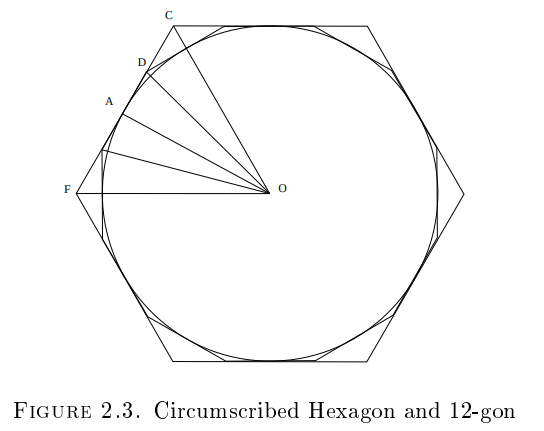

For this case, we are going to make OC, CF, FO equal to 1 to make this an equilateral triangle.  This will make the first approximation of pi a little easier.  The above paper states that Archimedes started with known ratios of OA/AC and OC/CA, so we will start with all values OX, XY, YO.


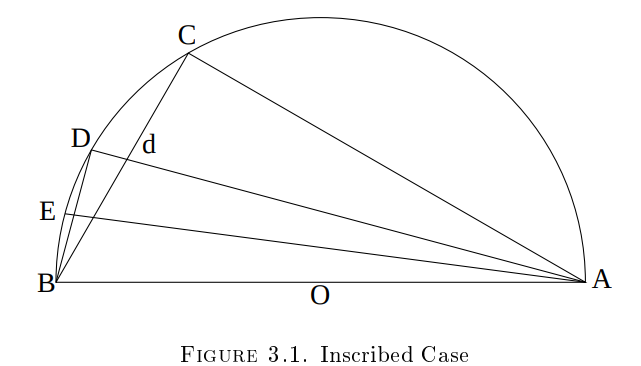



The inscribed case is similar, but it uses different ratios to approximate the side lengths of the polygons.  Line AD bisects CB, then AE bisects DB and so on. 

We can then use Archimedes formulas to calculate the ratio between diameter of the circle (BA) and a side length (BC, BD, BE, etc.).  Now by knowing we start with 6 sides, we simply multiply the ratio mentioned before by the number of sides, and we have our lower bound approximation of pi. 

In [14]:
import math

In [20]:
def upper_bound():
    ans_vec = []
    OX = 1 # sides of triangle
    XY = 1/2
    YO = math.sqrt(OX**2 - XY**2)
    num_sides = 6
    ans_vec.append(num_sides*(XY/YO)) # approximating pi with forumla from paper above
    num_sides *= 2

    XO_XY, OY_YX  = 0,0 # the two ratios needed for Archimedes's method
                        # we will iterate these variables every time we increase the number of polygon sides
    OY_YX = (YO/XY) + (OX/XY) # formula for calculating OA/DA from CO/CA and OA/AC
                              
    XO_XY = math.sqrt(OY_YX**2 +1)  # calc with paper from formula OD/DA
    ans_vec.append(num_sides*(1/OY_YX)) # aprroximating pi!


    for ii in range(1,9):
        num_sides *= 2
        OY_YX = OY_YX + XO_XY # iterate to new side ratio
        XO_XY = math.sqrt(OY_YX**2 +1) # stated in paper from above
        ans_vec.append(num_sides*(1/OY_YX)) # approximating pi again!
    return ans_vec

    
def lower_bound():
    # We will start assuming <CAB is pi/6 (stated by Archemedies), making AB=2 , and BC=1 => AC = sqrt(3)
    ans_vec = [] 
    num_sides = 6 # We are starting with a 6 sided polygon
    AB = 2
    BC = 1
    AC = math.sqrt(3)
    ans_vec.append((num_sides*BC)/AB) #perimeter/diameter
    AX_XB = (AB+AC)/BC
    AB_XB = math.sqrt(AX_XB**2 +1)
    num_sides *= 2
    ans_vec.append(num_sides/AB_XB) # AB_XB is the ratio of diameter/perimeter
                                    # so to get approximate pi vals, we do
                                    # num_sides / (diameter/perimeter)
    for i in range (1,9):
        num_sides *= 2 
        AX_XB = AX_XB + AB_XB # using Archimedes method to further recursively approximate pi
        AB_XB = math.sqrt(AX_XB**2 +1)
        ans_vec.append(num_sides/AB_XB)
    return ans_vec
    

high_b, low_b = [], []
num_sides = []
for ii in range(0,10):
    num_sides.append(6*(2**ii))
high_b, low_b = upper_bound(), lower_bound()

for ii in range(0,10):
    print('%s\t%.10f\t%.10f' % (num_sides[ii], low_b[ii], high_b[ii]))
# print('%s\t%s\t%15s\t' % (num_sides, low_b, high_b))

6	3.0000000000	3.4641016151
12	3.1058285412	3.2153903092
24	3.1326286133	3.1596599421
48	3.1393502030	3.1460862151
96	3.1410319509	3.1427145996
192	3.1414524723	3.1418730500
384	3.1415576079	3.1416627471
768	3.1415838921	3.1416101766
1536	3.1415904632	3.1415970343
3072	3.1415921060	3.1415937488


### Problem 4: Trigonometric Functions (for grad credit)


In [3]:
import math

In [21]:

def sine_tim(num, ϵ):
    taylor_sine = lambda x, n: ((-1)**n)*((x**(2*n+1))/math.factorial(2*n+1)) # lambda function for taylor series
    term, ans, last_ans = 0, 0, 0 # current term error, term number for T-series, accumulator for taylor series
    # last_ans is used for error calculation
    cur_error = 5*ϵ # just so the while loop does not exit right away    
    while cur_error > ϵ:
        if term == 0:
            ans = last_ans = taylor_sine(num, term)
            term += 1
            
        else:
            ans += taylor_sine(num, term)
            cur_error = abs((ans - last_ans) / ans) # calculate the error 
            last_ans +=  taylor_sine(num, term)
            term +=1 
    return ans
               
def cosine_tim(num, ϵ):
    taylor_cos = lambda x, n: ((-1)**n)*((x**(2*n))/math.factorial(2*n))
    term, ans, last_ans = 0, 0, 0 # current term error, term number for T-series, accumulator for taylor series
    # last_ans is used for error calculation
    cur_error = 5 * ϵ # just so the while loop does not exit right away
    while cur_error > ϵ:
        if term == 0:
            ans = last_ans = taylor_cos(num, term)
            term += 1
            
        else:
            ans += taylor_cos(num, term)
            cur_error = abs((ans - last_ans) / ans)
            last_ans +=  taylor_cos(num, term)
            term += 1 
    return ans
    
def tangent_tim(num, ϵ):
    # tangent is just sin(x)/cos(x), so we can use the lambda functions we already created
    # computing the taylor series for tangent gets hairy fast because it's derivatives are not as nice
    # as sine and cosine
    temp_sine = sine_tim(num, ϵ)
    temp_cos = cosine_tim(num, ϵ)
    return temp_sine / temp_cos

# a code example

num = float(input('Please enter a number in radians: '))
error = float(input('Enter the desired error: '))
sine_ans = sine_tim(num, error)
cosine_ans = cosine_tim(num, error)
tan_ans = tangent_tim(num, error)

print(f'Sine: {sine_ans}\nCosine: {cosine_ans}\nTangent: {tan_ans}')
            
            
    




Please enter a number in radians: 15
Enter the desired error: 10e-6
Sine: 0.6502877933714717
Cosine: -0.7596880776926994
Tangent: -0.8559931535933869
